In [1]:
import torch
from kan import *
torch.set_default_dtype(torch.float64)

In [2]:
model = KAN(width=[2,5,1], grid=5, seed=0)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f)

In [3]:
model.train(dataset, steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.56e-01 | test loss: 1.31e-01 | reg: 2.06e+01 : 100%|██| 20/20 [00:04<00:00,  4.61it/s]


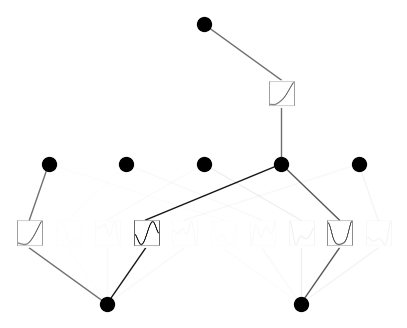

In [4]:
model.plot()

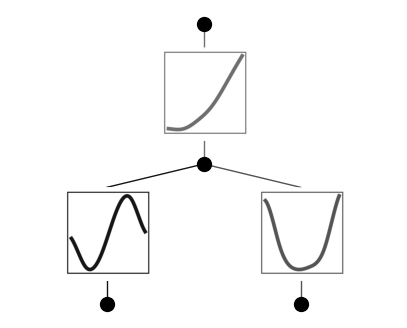

In [5]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [6]:
model.suggest_symbolic(0,0,0)

function , r2
sin , 0.9981435384614346
gaussian , 0.9372850537435943
tanh , 0.864663814173981
sigmoid , 0.8617160299675625
arctan , 0.846128209117493


('sin',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9981435384614346)

In [7]:
model.suggest_symbolic(0,1,0)

function , r2
cosh , 0.9911498114374642
x^2 , 0.988605503326441
gaussian , 0.9885380869524595
sin , 0.9860418325140378
x^4 , 0.9399961325134945


('cosh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9911498114374642)

In [8]:
model.suggest_symbolic(1,0,0)

function , r2
sin , 0.999606754775972
x^2 , 0.9992152804621905
cosh , 0.9990078159484161
gaussian , 0.9989708291114641
tanh , 0.9986835624763113


('sin',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.999606754775972)

In [9]:
model.suggest_symbolic(1,0,0,topk=15)

function , r2
sin , 0.999606754775972
x^2 , 0.9992152804621905
cosh , 0.9990078159484161
gaussian , 0.9989708291114641
tanh , 0.9986835624763113
sigmoid , 0.9986835614714775
arctan , 0.9970818677777312
x^3 , 0.9961322673988178
x^4 , 0.9946807551957417
exp , 0.9913179990753158
1/x^4 , 0.9890518907737625
1/x^3 , 0.9884541225692077
1/x^2 , 0.9874496218325501
1/x , 0.9853521955055019
1/sqrt(x) , 0.9831512911750099


('sin',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.999606754775972)

train loss: 4.74e-03 | test loss: 4.80e-03 | reg: 2.92e+00 : 100%|██| 20/20 [00:01<00:00, 16.16it/s]


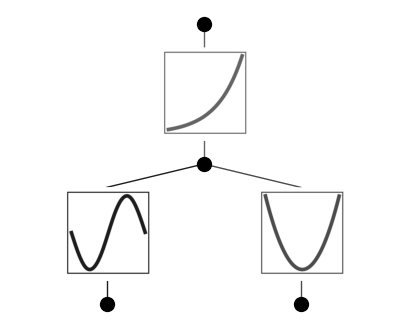

In [10]:
model.train(dataset, steps=20);
model.plot()

In [11]:
model.suggest_symbolic(0,0,0)
model.suggest_symbolic(0,1,0)
model.suggest_symbolic(1,0,0)

function , r2
sin , 0.9999871689694712
gaussian , 0.9216605100628872
tanh , 0.8631256990972038
sigmoid , 0.8593954258955341
arctan , 0.8440196677614465
function , r2
x^2 , 0.9999997311839003
cosh , 0.9999918137664411
gaussian , 0.9999827370077395
sin , 0.9980872132704512
abs , 0.9377547788709797
function , r2
exp , 0.9999988343741189
cosh , 0.999921158355886
tanh , 0.9999138101915199
sigmoid , 0.9998673087790316
gaussian , 0.9998492070994427


('exp',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9999988343741189)

In [12]:
model.auto_symbolic()
# lib = ['sin', 'x^2', 'exp']
# model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999871689694712
fixing (0,1,0) with x^2, r2=0.9999997311839003
fixing (1,0,0) with exp, r2=0.9999988343741189


train loss: 1.18e-15 | test loss: 1.05e-15 | reg: 2.92e+00 : 100%|██| 20/20 [00:00<00:00, 23.84it/s]


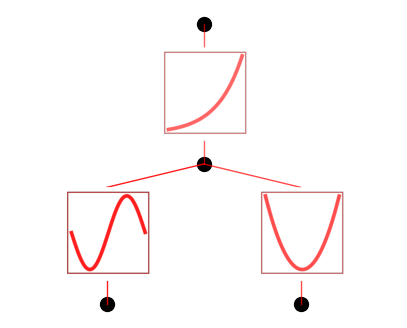

In [13]:
model.train(dataset, steps=20);
model.plot()

In [14]:
model.symbolic_formula()

([1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))], [x_1, x_2])

In [15]:
formula = model.symbolic_formula()[0][0]
formula

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))

In [16]:
variables = model.symbolic_formula()[1]
variables

[x_1, x_2]

In [17]:
from sympy import *
u_x1=diff(formula,variables[0])
u_x2=diff(formula,variables[1])
u_x1,u_x2

(3.14013671875*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))*cos(3.14*x_1),
 2.0*x_2*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1)))

In [18]:
model.fix_symbolic(0,1,0,'cosh')

r2 is 0.9999935647235351


tensor(1.0000)

train loss: 1.27e-03 | test loss: 1.29e-03 | reg: 2.93e+00 : 100%|██| 20/20 [00:01<00:00, 12.60it/s]


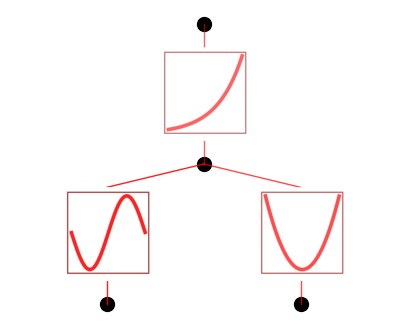

In [19]:
model.train(dataset, steps=20);
model.plot()

如果第一个函数不猜它是sin，猜它是cos的话，loss就会变成1e-3，就会比之前的1e-15要高很多。

train loss: 2.79e-03 | test loss: 2.79e-03 | reg: 3.12e-01 : 100%|██| 20/20 [00:00<00:00, 95.35it/s]


function , r2
sin , 0.9999842278894798
gaussian , 0.9184406080092781
tanh , 0.8635381682063197
sigmoid , 0.8601325311134499
arctan , 0.8450040981603413


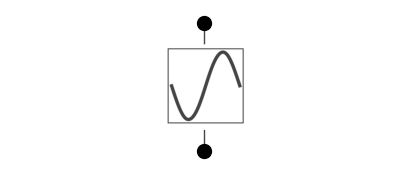

In [20]:
def toy(bound=1., noise=0., fun=lambda x: torch.sin(torch.pi*x)):

    num_pts = 101
    x = torch.linspace(-bound,bound,steps=num_pts)
    x = x[:,None]
    y = fun(x) + torch.normal(0,1,size=(num_pts,)) * noise
    dataset = {}
    dataset['train_input'] = dataset['test_input'] = x
    dataset['train_label'] = dataset['test_label'] = y
    model = KAN(width=[1,1], grid=5, k=3, seed=0, grid_range=(-bound,bound))
    model.train(dataset, opt="LBFGS", steps=20)
    model.suggest_symbolic(0,0,0)
    model.plot()

toy()

train loss: 9.30e-01 | test loss: 9.30e-01 | reg: 3.12e-01 : 100%|█| 20/20 [00:00<00:00, 102.71it/s]


function , r2
sin , 0.9999842278898886
gaussian , 0.9184406080013361
tanh , 0.863538168242599
sigmoid , 0.8601325311386543
arctan , 0.8450040981892959


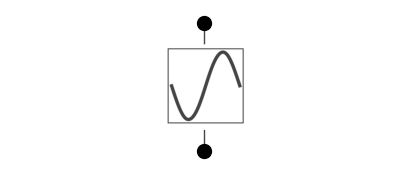

In [21]:
toy(noise=1.)

train loss: 9.30e-02 | test loss: 9.30e-02 | reg: 7.15e-01 : 100%|█| 20/20 [00:00<00:00, 105.47it/s]


function , r2
sin , 0.9999916591202916
arctan , 0.9999847147948843
tanh , 0.9999845173654862
x , 0.9999796669306343
abs , 0.9999796669306343


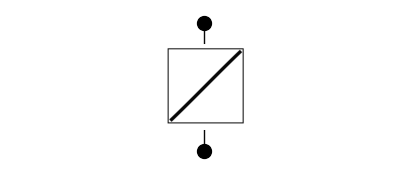

In [22]:
toy(bound = 0.1, noise=0.1)

In [23]:
def mix(a, b, bound=1):
    num_pts = 101
    x = torch.linspace(-bound,bound,steps=num_pts)
    x = x[:,None]
    y = a * torch.sin(x) + b * x**2 + (1-a-b) * torch.exp(x)
    dataset = {}
    dataset['train_input'] = dataset['test_input'] = x
    dataset['train_label'] = dataset['test_label'] = y
    model = KAN(width=[1,1], grid=10, k=3, seed=0, grid_range=(-bound,bound))
    model.train(dataset, opt="LBFGS", steps=20)
    return model.suggest_symbolic(0,0,0)[0]

mix(a=0.2,b=0.0)

train loss: 2.40e-06 | test loss: 2.40e-06 | reg: 2.64e-01 : 100%|██| 20/20 [00:00<00:00, 58.25it/s]


function , r2
cosh , 0.9999974775389502
exp , 0.9999670134495711
sigmoid , 0.9999606621521364
tanh , 0.9999524924647167
1/x^4 , 0.9999517926170829


'cosh'

In [24]:
num = 11
a_arr = np.linspace(0,1,num=num)
b_arr = np.linspace(0,1,num=num)
sf_mat = np.empty((num,num), dtype='U8')

for i in range(num):
    for j in range(num):
        a = a_arr[i]; b = b_arr[j]
        sf_mat[i,j] = mix(a, b)

train loss: 2.77e-06 | test loss: 2.77e-06 | reg: 2.72e-01 : 100%|██| 20/20 [00:00<00:00, 85.62it/s]


function , r2
cosh , 0.999999999982702
exp , 0.9999999999827016
tanh , 0.9999731637482994
sigmoid , 0.9999497922898924
1/x^4 , 0.9999369992759998


train loss: 2.53e-06 | test loss: 2.53e-06 | reg: 2.45e-01 : 100%|██| 20/20 [00:00<00:00, 77.72it/s]


function , r2
cosh , 0.9999988787113654
x^4 , 0.9999910880140954
gaussian , 0.9999674862963905
tanh , 0.9999518787259175
sigmoid , 0.9999484505371616


train loss: 2.28e-06 | test loss: 2.28e-06 | reg: 2.18e-01 : 100%|██| 20/20 [00:00<00:00, 75.41it/s]


function , r2
cosh , 0.9999946575637754
x^3 , 0.9999164116906399
gaussian , 0.9997468080513384
x^4 , 0.9996076211799361
tanh , 0.9995835694860895


train loss: 2.04e-06 | test loss: 2.04e-06 | reg: 1.94e-01 : 100%|██| 20/20 [00:00<00:00, 82.26it/s]


function , r2
cosh , 0.9999854846669899
x^3 , 0.998813892017088
gaussian , 0.9985227715657145
x^2 , 0.998477650070354
sin , 0.9981948138630072


train loss: 1.80e-06 | test loss: 1.80e-06 | reg: 1.71e-01 : 100%|██| 20/20 [00:00<00:00, 77.91it/s]


function , r2
cosh , 0.9999662581221709
x^2 , 0.9986097449344514
sin , 0.9982841286514488
x^3 , 0.9936582971048091
gaussian , 0.9936463187506869


train loss: 1.55e-06 | test loss: 1.55e-06 | reg: 1.51e-01 : 100%|██| 20/20 [00:00<00:00, 89.11it/s]


function , r2
cosh , 0.9999418178116654
x^2 , 0.9987944480607892
sin , 0.9984323316318737
gaussian , 0.9949686832549668
tanh , 0.9764364382443201


train loss: 1.31e-06 | test loss: 1.31e-06 | reg: 1.36e-01 : 100%|██| 20/20 [00:00<00:00, 83.81it/s]


function , r2
cosh , 0.9999041816268288
x^2 , 0.9990436001278847
sin , 0.9986633244995797
gaussian , 0.9958810456311507
tanh , 0.9380270364095961


train loss: 1.07e-06 | test loss: 1.07e-06 | reg: 1.29e-01 : 100%|██| 20/20 [00:00<00:00, 84.18it/s]


function , r2
cosh , 0.999865581868833
x^2 , 0.9993505000557614
sin , 0.9989811585949367
gaussian , 0.991625990056326
x^4 , 0.9172564495233289


train loss: 8.32e-07 | test loss: 8.32e-07 | reg: 1.27e-01 : 100%|██| 20/20 [00:00<00:00, 80.82it/s]


function , r2
x^2 , 0.9996700824943021
sin , 0.999388858117883
cosh , 0.9985612678193114
gaussian , 0.9707186857384194
abs , 0.9254006963665001


train loss: 6.00e-07 | test loss: 6.00e-07 | reg: 1.30e-01 : 100%|██| 20/20 [00:00<00:00, 87.54it/s]


function , r2
x^2 , 0.9999132817986727
sin , 0.9994936051765974
gaussian , 0.9994851357954283
cosh , 0.987913942213217
abs , 0.9339750941376334


train loss: 3.79e-07 | test loss: 3.79e-07 | reg: 1.38e-01 : 100%|██| 20/20 [00:00<00:00, 90.87it/s]


function , r2
x^2 , 0.9999999998837574
cosh , 0.9999099009612816
gaussian , 0.9997105669064182
sin , 0.9989290599783464
abs , 0.9374081749689824


train loss: 2.59e-06 | test loss: 2.59e-06 | reg: 2.68e-01 : 100%|██| 20/20 [00:00<00:00, 92.71it/s]


function , r2
arctan , 0.9999798376818974
cosh , 0.999977100260394
tanh , 0.9999633902834089
sigmoid , 0.9999541433675974
1/x^4 , 0.9999236485790649


train loss: 2.34e-06 | test loss: 2.34e-06 | reg: 2.40e-01 : 100%|██| 20/20 [00:00<00:00, 94.02it/s]


function , r2
cosh , 0.9999937207991116
x^4 , 0.9999862674000627
gaussian , 0.9999638602305349
sigmoid , 0.9999448386843441
x^3 , 0.9999438603806267


train loss: 2.10e-06 | test loss: 2.10e-06 | reg: 2.14e-01 : 100%|██| 20/20 [00:00<00:00, 83.63it/s]


function , r2
cosh , 0.9999949634057932
x^3 , 0.999884397185551
gaussian , 0.9997599295164779
tanh , 0.9996162757400006
sigmoid , 0.9996147714225984


train loss: 1.86e-06 | test loss: 1.86e-06 | reg: 1.89e-01 : 100%|█| 20/20 [00:00<00:00, 100.08it/s]


function , r2
cosh , 0.9999826962396265
x^2 , 0.9991234483879009
sin , 0.9988859253125598
x^3 , 0.9987772391387522
gaussian , 0.9986566399255161


train loss: 1.61e-06 | test loss: 1.61e-06 | reg: 1.66e-01 : 100%|██| 20/20 [00:00<00:00, 86.35it/s]


function , r2
cosh , 0.9999905018303333
x^2 , 0.9992854342509098
sin , 0.9988717593780931
gaussian , 0.9985721495293557
x^3 , 0.9939912670593163


train loss: 1.37e-06 | test loss: 1.37e-06 | reg: 1.45e-01 : 100%|██| 20/20 [00:00<00:00, 70.85it/s]


function , r2
cosh , 0.9999796806444763
x^2 , 0.9994805323547318
sin , 0.999190920658823
gaussian , 0.9964682981270021
tanh , 0.9772535252517106


train loss: 1.13e-06 | test loss: 1.13e-06 | reg: 1.29e-01 : 100%|██| 20/20 [00:00<00:00, 84.68it/s]


function , r2
cosh , 0.9999738670222863
x^2 , 0.9996973599781159
sin , 0.9994116683313201
gaussian , 0.9973545677207396
tanh , 0.9376915470800141


train loss: 8.85e-07 | test loss: 8.85e-07 | reg: 1.22e-01 : 100%|██| 20/20 [00:00<00:00, 88.44it/s]


function , r2
x^2 , 0.9998957469240597
cosh , 0.9998722722371505
sin , 0.9996590283040462
gaussian , 0.9939866829885108
abs , 0.9232648879244217


train loss: 6.46e-07 | test loss: 6.46e-07 | reg: 1.20e-01 : 100%|██| 20/20 [00:00<00:00, 91.63it/s]


function , r2
x^2 , 0.9999974059408481
sin , 0.9998341489004261
cosh , 0.9962063866007281
gaussian , 0.9754127817062368
abs , 0.9311623016140326


train loss: 4.18e-07 | test loss: 4.18e-07 | reg: 1.24e-01 : 100%|██| 20/20 [00:00<00:00, 87.43it/s]


function , r2
x^2 , 0.9999226429005159
sin , 0.9998636426800557
cosh , 0.9997752175292767
gaussian , 0.9996799588817684
abs , 0.9372397600706986


train loss: 2.23e-07 | test loss: 2.23e-07 | reg: 1.33e-01 : 100%|██| 20/20 [00:00<00:00, 80.45it/s]


function , r2
cosh , 0.9995568150248121
gaussian , 0.9993467471611758
sin , 0.9985870166410878
x^2 , 0.9984339446785276
abs , 0.9362895855254039


train loss: 2.40e-06 | test loss: 2.40e-06 | reg: 2.64e-01 : 100%|██| 20/20 [00:00<00:00, 62.17it/s]


function , r2
cosh , 0.9999974775389502
exp , 0.9999670134495711
sigmoid , 0.9999606621521364
tanh , 0.9999524924647167
1/x^4 , 0.9999517926170829


train loss: 2.16e-06 | test loss: 2.16e-06 | reg: 2.36e-01 : 100%|██| 20/20 [00:00<00:00, 78.20it/s]


function , r2
cosh , 0.999998785530415
x^3 , 0.9999772484087298
x^4 , 0.9999697464111793
gaussian , 0.9999593591293765
sigmoid , 0.9999388880062459


train loss: 1.92e-06 | test loss: 1.92e-06 | reg: 2.09e-01 : 100%|██| 20/20 [00:00<00:00, 43.17it/s]


function , r2
cosh , 0.9999993553594332
x^3 , 0.999821969854202
gaussian , 0.9997659958509871
tanh , 0.9996382853086407
sigmoid , 0.9996367454831319


train loss: 1.67e-06 | test loss: 1.67e-06 | reg: 1.84e-01 : 100%|██| 20/20 [00:00<00:00, 84.92it/s]


function , r2
cosh , 0.9999988957669829
x^2 , 0.9996199311454166
sin , 0.9994371094078144
gaussian , 0.9987635277874064
x^3 , 0.998660284775438


train loss: 1.43e-06 | test loss: 1.43e-06 | reg: 1.60e-01 : 100%|██| 20/20 [00:00<00:00, 78.38it/s]


function , r2
cosh , 0.9999954784529739
x^2 , 0.9997669036994892
sin , 0.9994959364459333
gaussian , 0.9992839638831973
x^3 , 0.9941048878104224


train loss: 1.19e-06 | test loss: 1.19e-06 | reg: 1.39e-01 : 100%|██| 20/20 [00:00<00:00, 79.12it/s]


function , r2
x^2 , 0.9999057877402505
cosh , 0.9997878856471616
sin , 0.9997010374754087
gaussian , 0.9978271729222246
sigmoid , 0.9780411748148902


train loss: 9.43e-07 | test loss: 9.43e-07 | reg: 1.23e-01 : 100%|██| 20/20 [00:00<00:00, 93.51it/s]


function , r2
x^2 , 0.9999916810769238
sin , 0.9998540286211695
gaussian , 0.9985646631912691
cosh , 0.9978692658705909
tanh , 0.9372183456910774


train loss: 7.05e-07 | test loss: 7.05e-07 | reg: 1.15e-01 : 100%|██| 20/20 [00:00<00:00, 89.84it/s]


function , r2
x^2 , 0.9999411945917988
sin , 0.9999178465308437
cosh , 0.9993168732978291
gaussian , 0.99611112896825
abs , 0.9302392302213522


train loss: 4.75e-07 | test loss: 4.75e-07 | reg: 1.13e-01 : 100%|██| 20/20 [00:00<00:00, 96.73it/s]


function , r2
sin , 0.9997864168657746
x^2 , 0.9996579498087806
cosh , 0.9942754283755239
gaussian , 0.9798855202432573
abs , 0.9369096690204314


train loss: 2.64e-07 | test loss: 2.64e-07 | reg: 1.18e-01 : 100%|██| 20/20 [00:00<00:00, 79.18it/s]


function , r2
sin , 0.9992177278910476
x^2 , 0.9991374701117473
gaussian , 0.9990884901618681
cosh , 0.9988973034719429
abs , 0.9396624038409194


train loss: 1.78e-07 | test loss: 1.78e-07 | reg: 1.27e-01 : 100%|██| 20/20 [00:00<00:00, 95.80it/s]


function , r2
x^2 , 0.998540782193425
cosh , 0.9984977830566113
sin , 0.9981679237234558
gaussian , 0.9980799911448323
abs , 0.9348151362008298


train loss: 2.22e-06 | test loss: 2.22e-06 | reg: 2.60e-01 : 100%|██| 20/20 [00:00<00:00, 87.06it/s]


function , r2
cosh , 0.9999930298639941
tanh , 0.9999821515316712
x^4 , 0.9999746028948474
arctan , 0.9999713956246286
sigmoid , 0.9999600902770324


train loss: 1.98e-06 | test loss: 1.98e-06 | reg: 2.32e-01 : 100%|██| 20/20 [00:00<00:00, 93.77it/s]


function , r2
cosh , 0.9999962889824617
x^3 , 0.9999811150224389
gaussian , 0.9999534848375875
tanh , 0.9999336923280293
sigmoid , 0.9999305175966879


train loss: 1.74e-06 | test loss: 1.74e-06 | reg: 2.05e-01 : 100%|██| 20/20 [00:00<00:00, 85.22it/s]


function , r2
cosh , 0.9999962156472602
x^2 , 0.9998260034206645
gaussian , 0.9997664875003973
x^3 , 0.9997117036934335
sin , 0.9997113407523722


train loss: 1.49e-06 | test loss: 1.49e-06 | reg: 1.79e-01 : 100%|██| 20/20 [00:00<00:00, 92.85it/s]


function , r2
cosh , 0.9999544661516739
x^2 , 0.9999233768387927
sin , 0.9998096068573202
gaussian , 0.9988466333875766
x^3 , 0.9984457355677469


train loss: 1.25e-06 | test loss: 1.25e-06 | reg: 1.55e-01 : 100%|██| 20/20 [00:00<00:00, 84.47it/s]


function , r2
x^2 , 0.9999875880503221
cosh , 0.9999623957580922
sin , 0.9998842247680604
gaussian , 0.9997446918459608
x^3 , 0.9939812278057285


train loss: 1.01e-06 | test loss: 1.01e-06 | reg: 1.33e-01 : 100%|██| 20/20 [00:00<00:00, 96.56it/s]


function , r2
x^2 , 0.9999658213074154
sin , 0.9998830954292185
cosh , 0.9991428566546396
gaussian , 0.9988921913943388
tanh , 0.9787975107819123


train loss: 7.68e-07 | test loss: 7.68e-07 | reg: 1.16e-01 : 100%|██| 20/20 [00:00<00:00, 90.22it/s]


function , r2
sin , 0.999932407899124
x^2 , 0.999759679594185
cosh , 0.9994865919109508
gaussian , 0.9994862477413599
tanh , 0.9365762760180398


train loss: 5.36e-07 | test loss: 5.36e-07 | reg: 1.08e-01 : 100%|██| 20/20 [00:00<00:00, 94.30it/s]


function , r2
sin , 0.9997548044484267
x^2 , 0.999230199516523
cosh , 0.997913773352431
gaussian , 0.9977997203779693
abs , 0.9377138311299278


train loss: 3.19e-07 | test loss: 3.19e-07 | reg: 1.07e-01 : 100%|██| 20/20 [00:00<00:00, 84.47it/s]


function , r2
sin , 0.999079008618843
x^2 , 0.9983067970849461
cosh , 0.9912197954470462
gaussian , 0.9838364844041954
abs , 0.9422994090334298


train loss: 1.88e-07 | test loss: 1.88e-07 | reg: 1.12e-01 : 100%|██| 20/20 [00:00<00:00, 79.28it/s]


function , r2
sin , 0.9974240586296159
gaussian , 0.9973311148206387
x^2 , 0.9971996559803542
cosh , 0.9968911992725936
abs , 0.9402041148610982


train loss: 2.92e-07 | test loss: 2.92e-07 | reg: 1.21e-01 : 100%|██| 20/20 [00:00<00:00, 84.63it/s]


function , r2
cosh , 0.9964799073279654
x^2 , 0.9963340407059311
sin , 0.9959863127873617
gaussian , 0.9956440035978794
abs , 0.9297638765895849


train loss: 2.04e-06 | test loss: 2.04e-06 | reg: 2.57e-01 : 100%|██| 20/20 [00:00<00:00, 81.88it/s]


function , r2
x^4 , 0.9999894819791961
x^3 , 0.9999835049272683
tanh , 0.9999809890206299
cosh , 0.999980411354182
sigmoid , 0.9999728460827058


train loss: 1.80e-06 | test loss: 1.80e-06 | reg: 2.28e-01 : 100%|██| 20/20 [00:00<00:00, 44.07it/s]


function , r2
cosh , 0.9999673824655897
gaussian , 0.9999462035017707
x^2 , 0.9999377572938327
x^3 , 0.9999347397452717
tanh , 0.9999253636496872


train loss: 1.56e-06 | test loss: 1.56e-06 | reg: 2.00e-01 : 100%|██| 20/20 [00:00<00:00, 87.01it/s]


function , r2
x^2 , 0.999985695732037
cosh , 0.9999806264360631
sin , 0.99993339051608
gaussian , 0.9997629877628732
tanh , 0.9996615330716183


train loss: 1.31e-06 | test loss: 1.31e-06 | reg: 1.74e-01 : 100%|██| 20/20 [00:00<00:00, 88.48it/s]


function , r2
x^2 , 0.9999803474423326
sin , 0.999969017936059
cosh , 0.9996537442008884
gaussian , 0.9989097397450559
tanh , 0.9985534483567415


train loss: 1.07e-06 | test loss: 1.07e-06 | reg: 1.50e-01 : 100%|██| 20/20 [00:00<00:00, 95.70it/s]


function , r2
sin , 0.9999726154716627
gaussian , 0.9999250404432444
x^2 , 0.9998623405073125
cosh , 0.9996561770570848
tanh , 0.9942785952550663


train loss: 8.35e-07 | test loss: 8.35e-07 | reg: 1.28e-01 : 100%|██| 20/20 [00:00<00:00, 68.63it/s]


function , r2
sin , 0.9999424641676218
gaussian , 0.9999091837427306
x^2 , 0.9995191008698875
cosh , 0.9978922471123205
tanh , 0.9795181094996755


train loss: 6.03e-07 | test loss: 6.03e-07 | reg: 1.10e-01 : 100%|██| 20/20 [00:00<00:00, 92.34it/s]


function , r2
sin , 0.9998135112168239
gaussian , 0.9997873237383771
x^2 , 0.9987606438436489
cosh , 0.9982635098441985
abs , 0.9422869570500714


train loss: 3.87e-07 | test loss: 3.87e-07 | reg: 1.01e-01 : 100%|██| 20/20 [00:00<00:00, 94.97it/s]


function , r2
sin , 0.9992995819998389
gaussian , 0.9987377926583594
x^2 , 0.9973752641588288
cosh , 0.9952551401327192
abs , 0.9455257642405964


train loss: 2.37e-07 | test loss: 2.37e-07 | reg: 1.00e-01 : 100%|██| 20/20 [00:00<00:00, 88.64it/s]


function , r2
sin , 0.9974728070753985
x^2 , 0.9954161612376896
gaussian , 0.9867522256463263
cosh , 0.9865827114166489
abs , 0.9468472932133971


train loss: 2.80e-07 | test loss: 2.80e-07 | reg: 1.05e-01 : 100%|██| 20/20 [00:00<00:00, 84.86it/s]


function , r2
sin , 0.9938672203940739
gaussian , 0.9937913539706628
x^2 , 0.993605790532844
cosh , 0.9932430068620165
abs , 0.9381962721731006


train loss: 4.63e-07 | test loss: 4.63e-07 | reg: 1.16e-01 : 100%|██| 20/20 [00:00<00:00, 91.79it/s]


function , r2
x^2 , 0.9927305609303276
sin , 0.9922829131296039
gaussian , 0.9916990159550585
cosh , 0.9856394269257037
abs , 0.9212244844824521


train loss: 1.86e-06 | test loss: 1.86e-06 | reg: 2.53e-01 : 100%|██| 20/20 [00:00<00:00, 82.36it/s]


function , r2
cosh , 0.9999888112901125
x^2 , 0.9999849501569301
tanh , 0.9999760956345866
x^3 , 0.9999758615432642
sigmoid , 0.9999716645394074


train loss: 1.62e-06 | test loss: 1.62e-06 | reg: 2.24e-01 : 100%|██| 20/20 [00:00<00:00, 81.54it/s]


function , r2
x^2 , 0.9999870715346316
sin , 0.9999811871919867
cosh , 0.9999553343367016
gaussian , 0.9999383081017053
tanh , 0.9999177958838928


train loss: 1.38e-06 | test loss: 1.38e-06 | reg: 1.96e-01 : 100%|██| 20/20 [00:00<00:00, 72.61it/s]


function , r2
sin , 0.9999859303543724
gaussian , 0.9999644813364003
x^2 , 0.9999214589741494
tanh , 0.9996703332150539
sigmoid , 0.9996690041252998


train loss: 1.14e-06 | test loss: 1.14e-06 | reg: 1.69e-01 : 100%|██| 20/20 [00:00<00:00, 94.60it/s]


function , r2
sin , 0.9999802936974105
x^2 , 0.9997259928374086
cosh , 0.9993475620343961
gaussian , 0.9989573036825982
tanh , 0.9986543793635355


train loss: 9.05e-07 | test loss: 9.05e-07 | reg: 1.44e-01 : 100%|██| 20/20 [00:00<00:00, 93.47it/s]


function , r2
sin , 0.9999585866506354
gaussian , 0.9999486876816769
x^2 , 0.9992827278182825
cosh , 0.9988740875786745
tanh , 0.9946613426799349


train loss: 6.75e-07 | test loss: 6.75e-07 | reg: 1.22e-01 : 100%|██| 20/20 [00:00<00:00, 92.91it/s]


function , r2
sin , 0.9998822169169301
gaussian , 0.9998780401033215
x^2 , 0.9983740754621699
cosh , 0.9979460330485459
tanh , 0.9802089053770169


train loss: 4.60e-07 | test loss: 4.60e-07 | reg: 1.04e-01 : 100%|██| 20/20 [00:00<00:00, 82.96it/s]


function , r2
gaussian , 0.9995976666769363
sin , 0.99959370685733
x^2 , 0.9966491597089184
cosh , 0.995880200099317
abs , 0.9512847855783654


train loss: 2.98e-07 | test loss: 2.98e-07 | reg: 9.48e-02 : 100%|██| 20/20 [00:00<00:00, 88.06it/s]


function , r2
sin , 0.9984509165917254
gaussian , 0.995957895214673
x^2 , 0.9937818028904412
cosh , 0.9907205081495966
abs , 0.953465106977382


train loss: 2.89e-07 | test loss: 2.89e-07 | reg: 9.37e-02 : 100%|██| 20/20 [00:00<00:00, 79.15it/s]


function , r2
sin , 0.9943901136294726
x^2 , 0.9902053436428983
gaussian , 0.9877626753749952
cosh , 0.9761222166059067
abs , 0.9497419182671474


train loss: 4.40e-07 | test loss: 4.40e-07 | reg: 9.91e-02 : 100%|██| 20/20 [00:00<00:00, 87.15it/s]


function , r2
gaussian , 0.9876449536076236
sin , 0.9874566180786892
cosh , 0.9873751146495566
x^2 , 0.9871135812432273
abs , 0.9320312251285601


train loss: 6.40e-07 | test loss: 6.40e-07 | reg: 1.10e-01 : 100%|██| 20/20 [00:00<00:00, 92.94it/s]


function , r2
x^2 , 0.9873681256920969
sin , 0.9867104677131697
cosh , 0.9863604874844314
gaussian , 0.985936075074173
x^4 , 0.9239128488596007


train loss: 1.69e-06 | test loss: 1.69e-06 | reg: 2.50e-01 : 100%|██| 20/20 [00:00<00:00, 91.12it/s]


function , r2
sin , 0.9999907076167003
tanh , 0.999972304336498
sigmoid , 0.9999701323518755
gaussian , 0.9999551813924071
x^2 , 0.9999522532756392


train loss: 1.45e-06 | test loss: 1.45e-06 | reg: 2.20e-01 : 100%|██| 20/20 [00:00<00:00, 64.37it/s]


function , r2
sin , 0.9999900693558677
gaussian , 0.99993114241388
tanh , 0.9999145247285155
sigmoid , 0.9999130487051516
x^2 , 0.9998377026660177


train loss: 1.21e-06 | test loss: 1.21e-06 | reg: 1.92e-01 : 100%|██| 20/20 [00:00<00:00, 91.71it/s]


function , r2
sin , 0.9999862820441364
gaussian , 0.9997517753888494
tanh , 0.9996841983207471
sigmoid , 0.9996830107875418
x^2 , 0.9995857671343534


train loss: 9.77e-07 | test loss: 9.77e-07 | reg: 1.65e-01 : 100%|█| 20/20 [00:00<00:00, 100.01it/s]


function , r2
sin , 0.9999745726297435
x^2 , 0.9990823277409733
gaussian , 0.9989945842737303
cosh , 0.9988728127878564
tanh , 0.9987539221776318


train loss: 7.49e-07 | test loss: 7.49e-07 | reg: 1.39e-01 : 100%|██| 20/20 [00:00<00:00, 81.02it/s]


function , r2
sin , 0.9999370198219653
x^2 , 0.99811154788943
cosh , 0.9974772652019964
gaussian , 0.9957317170583971
tanh , 0.9950291700752711


train loss: 5.36e-07 | test loss: 5.36e-07 | reg: 1.16e-01 : 100%|██| 20/20 [00:00<00:00, 84.69it/s]


function , r2
gaussian , 0.9998221482802612
sin , 0.9998030639264434
x^2 , 0.9962716348433488
cosh , 0.9957027344616888
tanh , 0.9808861574176466


train loss: 3.67e-07 | test loss: 3.67e-07 | reg: 9.76e-02 : 100%|██| 20/20 [00:00<00:00, 77.29it/s]


function , r2
gaussian , 0.9993158902103385
sin , 0.9992737234350303
x^2 , 0.9929134959393118
cosh , 0.9918352264630348
abs , 0.9605168885405216


train loss: 3.18e-07 | test loss: 3.18e-07 | reg: 8.81e-02 : 100%|██| 20/20 [00:00<00:00, 67.63it/s]


function , r2
sin , 0.997061638014598
gaussian , 0.9966420291549094
x^2 , 0.9875208727419774
cosh , 0.9833481549923393
abs , 0.9611248513905672


train loss: 4.31e-07 | test loss: 4.31e-07 | reg: 8.70e-02 : 100%|██| 20/20 [00:00<00:00, 68.75it/s]


function , r2
sin , 0.988825450908268
x^2 , 0.9814244208615115
gaussian , 0.9756945249095085
cosh , 0.9653653220067909
abs , 0.9498920594017423


train loss: 6.17e-07 | test loss: 6.17e-07 | reg: 9.30e-02 : 100%|██| 20/20 [00:00<00:00, 79.75it/s]


function , r2
cosh , 0.9783739534895318
gaussian , 0.9779770648516352
sin , 0.9773944419103046
x^2 , 0.9772100499764201
abs , 0.9197221129777845


train loss: 8.36e-07 | test loss: 8.36e-07 | reg: 1.06e-01 : 100%|██| 20/20 [00:00<00:00, 88.07it/s]


function , r2
cosh , 0.9847797381597689
x^2 , 0.9798814750945282
sin , 0.9789559646114564
gaussian , 0.9779176281836975
x^4 , 0.9285991153013622


train loss: 1.51e-06 | test loss: 1.51e-06 | reg: 2.46e-01 : 100%|██| 20/20 [00:00<00:00, 42.47it/s]


function , r2
sin , 0.9999930938320782
gaussian , 0.9999927495922177
tanh , 0.9999730056760313
sigmoid , 0.9999716131852106
arctan , 0.9999521920792561


train loss: 1.28e-06 | test loss: 1.28e-06 | reg: 2.17e-01 : 100%|██| 20/20 [00:00<00:00, 88.74it/s]


function , r2
sin , 0.9999916138797182
gaussian , 0.9999262185843517
tanh , 0.999919152892524
sigmoid , 0.9999179925256837
arctan , 0.9998352652530961


train loss: 1.05e-06 | test loss: 1.05e-06 | reg: 1.88e-01 : 100%|██| 20/20 [00:00<00:00, 89.40it/s]


function , r2
gaussian , 0.9999899760530495
sin , 0.9999866880205353
tanh , 0.9997096545485855
sigmoid , 0.999708609319144
arctan , 0.99939503758822


train loss: 8.25e-07 | test loss: 8.25e-07 | reg: 1.60e-01 : 100%|██| 20/20 [00:00<00:00, 88.10it/s]


function , r2
sin , 0.9999712618940477
gaussian , 0.9990277391370066
tanh , 0.9988653756686111
sigmoid , 0.9988643627330017
x^2 , 0.9979566871602119


train loss: 6.15e-07 | test loss: 6.15e-07 | reg: 1.34e-01 : 100%|██| 20/20 [00:00<00:00, 83.72it/s]


function , r2
gaussian , 0.9999414756950427
sin , 0.9999185788926351
x^2 , 0.9961768265524498
tanh , 0.9954056127806297
sigmoid , 0.9954045447763697


train loss: 4.42e-07 | test loss: 4.42e-07 | reg: 1.11e-01 : 100%|██| 20/20 [00:00<00:00, 79.99it/s]


function , r2
gaussian , 0.9997728550729015
sin , 0.9997168387524795
x^2 , 0.9928623326983125
cosh , 0.9921522541170684
tanh , 0.9815839510206096


train loss: 3.64e-07 | test loss: 3.64e-07 | reg: 9.13e-02 : 100%|██| 20/20 [00:00<00:00, 88.96it/s]


function , r2
gaussian , 0.9989709402248393
sin , 0.9988544685797394
x^2 , 0.9868026386832375
cosh , 0.9853452365827485
abs , 0.9698770230381348


train loss: 4.35e-07 | test loss: 4.35e-07 | reg: 8.13e-02 : 100%|██| 20/20 [00:00<00:00, 74.64it/s]


function , r2
gaussian , 0.9949371389286454
sin , 0.994910778237166
x^2 , 0.9771129552879542
cosh , 0.9716178500775624
abs , 0.9677226403599452


train loss: 6.03e-07 | test loss: 6.03e-07 | reg: 8.00e-02 : 100%|██| 20/20 [00:00<00:00, 74.62it/s]


function , r2
sin , 0.9790424824769614
gaussian , 0.9715243025802737
x^2 , 0.9671692490975634
cosh , 0.9450165956951464
abs , 0.9448625902180021


train loss: 8.07e-07 | test loss: 8.07e-07 | reg: 8.69e-02 : 100%|██| 20/20 [00:00<00:00, 77.05it/s]


function , r2
cosh , 0.9654617174955895
x^2 , 0.9648932341044604
sin , 0.9638567104875222
gaussian , 0.9636801162028463
x^4 , 0.9002751610446402


train loss: 1.03e-06 | test loss: 1.03e-06 | reg: 1.03e-01 : 100%|██| 20/20 [00:00<00:00, 73.88it/s]


function , r2
cosh , 0.9807409640067426
x^2 , 0.9699721931124994
sin , 0.9677166767933401
gaussian , 0.9394860427808821
x^4 , 0.9351858394895876


train loss: 1.36e-06 | test loss: 1.36e-06 | reg: 2.43e-01 : 100%|██| 20/20 [00:00<00:00, 79.80it/s]


function , r2
gaussian , 0.9999978669498218
sin , 0.9999956722754604
tanh , 0.9999799263714336
sigmoid , 0.9999789216022037
arctan , 0.9999642054598482


train loss: 1.13e-06 | test loss: 1.13e-06 | reg: 2.13e-01 : 100%|██| 20/20 [00:00<00:00, 82.86it/s]


function , r2
sin , 0.9999943906885264
tanh , 0.9999343640825212
sigmoid , 0.9999334248883597
gaussian , 0.999924943993554
arctan , 0.9998684985490299


train loss: 9.03e-07 | test loss: 9.03e-07 | reg: 1.84e-01 : 100%|██| 20/20 [00:00<00:00, 83.39it/s]


function , r2
sin , 0.9999896507243776
tanh , 0.9997526274283585
sigmoid , 0.9997517092998388
gaussian , 0.9997514568009345
arctan , 0.9994994651669774


train loss: 6.94e-07 | test loss: 6.94e-07 | reg: 1.56e-01 : 100%|██| 20/20 [00:00<00:00, 76.82it/s]


function , r2
gaussian , 0.9999899485874042
sin , 0.9999314322919381
tanh , 0.9990030069449752
sigmoid , 0.999002060933312
arctan , 0.9981096381935922


train loss: 5.19e-07 | test loss: 5.19e-07 | reg: 1.30e-01 : 100%|██| 20/20 [00:00<00:00, 72.43it/s]


function , r2
gaussian , 0.9999536171666585
sin , 0.9999094157329156
tanh , 0.9958217326641222
sigmoid , 0.9958206863503661
x^2 , 0.9932659752645822


train loss: 4.21e-07 | test loss: 4.21e-07 | reg: 1.06e-01 : 100%|██| 20/20 [00:00<00:00, 71.49it/s]


function , r2
gaussian , 0.9997544064397688
sin , 0.9996390145600564
x^2 , 0.987678281706908
cosh , 0.9868291204722469
tanh , 0.9823615338320616


train loss: 4.54e-07 | test loss: 4.54e-07 | reg: 8.52e-02 : 100%|██| 20/20 [00:00<00:00, 75.01it/s]


function , r2
gaussian , 0.9985268503109531
sin , 0.9983499410480562
abs , 0.9785902377370621
x^2 , 0.9771995020806004
cosh , 0.9752846715565371


train loss: 5.93e-07 | test loss: 5.93e-07 | reg: 7.45e-02 : 100%|██| 20/20 [00:00<00:00, 68.94it/s]


function , r2
gaussian , 0.9917386172087291
sin , 0.99169990959223
abs , 0.9717770596413987
x^2 , 0.9601566417353579
cosh , 0.9530802418708522


train loss: 7.85e-07 | test loss: 7.85e-07 | reg: 7.31e-02 : 100%|██| 20/20 [00:00<00:00, 79.96it/s]


function , r2
sin , 0.9620464258208505
gaussian , 0.9582876791833271
x^2 , 0.9445008625369162
cosh , 0.943068724260125
abs , 0.9308710216290733


train loss: 9.96e-07 | test loss: 9.96e-07 | reg: 8.13e-02 : 100%|██| 20/20 [00:00<00:00, 76.64it/s]


function , r2
cosh , 0.9480750123054508
x^2 , 0.9456250628470112
sin , 0.9445956284906087
gaussian , 0.9434289429006972
x^4 , 0.9009688700126035


train loss: 1.22e-06 | test loss: 1.22e-06 | reg: 1.02e-01 : 100%|██| 20/20 [00:00<00:00, 66.19it/s]


function , r2
cosh , 0.9766929896375438
x^2 , 0.9575144937836514
sin , 0.9559851348525468
x^4 , 0.9438827362825641
gaussian , 0.9167827938847094


train loss: 1.20e-06 | test loss: 1.20e-06 | reg: 2.39e-01 : 100%|██| 20/20 [00:00<00:00, 80.32it/s]


function , r2
sin , 0.9999984333249287
sigmoid , 0.9999901865767755
arctan , 0.99998295801106
gaussian , 0.99997465463925
tanh , 0.999939312316084


train loss: 9.82e-07 | test loss: 9.82e-07 | reg: 2.10e-01 : 100%|██| 20/20 [00:00<00:00, 80.40it/s]


function , r2
sin , 0.9999977984106977
gaussian , 0.9999963838908157
tanh , 0.9999585593095566
sigmoid , 0.9999577735631637
arctan , 0.999915064572885


train loss: 7.75e-07 | test loss: 7.75e-07 | reg: 1.80e-01 : 100%|██| 20/20 [00:00<00:00, 82.64it/s]


function , r2
gaussian , 0.9999953796079764
sin , 0.9999944856462161
tanh , 0.9998140271260386
sigmoid , 0.9998132139652812
arctan , 0.9996263187287531


train loss: 5.99e-07 | test loss: 5.99e-07 | reg: 1.52e-01 : 100%|██| 20/20 [00:00<00:00, 84.44it/s]


function , r2
sin , 0.99997991319785
tanh , 0.9991760870939249
sigmoid , 0.9991752064513065
gaussian , 0.9991099365080028
arctan , 0.9984657428833337


train loss: 4.86e-07 | test loss: 4.86e-07 | reg: 1.25e-01 : 100%|██| 20/20 [00:00<00:00, 73.51it/s]


function , r2
gaussian , 0.9999683931970763
sin , 0.9999135788767781
tanh , 0.9963089132034889
sigmoid , 0.996307895542435
arctan , 0.9939227717854909


train loss: 4.85e-07 | test loss: 4.85e-07 | reg: 1.00e-01 : 100%|██| 20/20 [00:00<00:00, 84.08it/s]


function , r2
gaussian , 0.9997689201744406
sin , 0.9995873145215632
abs , 0.9849023647727453
tanh , 0.9833009867711194
sigmoid , 0.9832997013648223


train loss: 5.93e-07 | test loss: 5.93e-07 | reg: 7.91e-02 : 100%|██| 20/20 [00:00<00:00, 84.18it/s]


function , r2
gaussian , 0.9982643783384036
sin , 0.9977962501289268
abs , 0.9854353082951098
x^2 , 0.9624423927207832
cosh , 0.9600011409875814


train loss: 7.70e-07 | test loss: 7.70e-07 | reg: 6.75e-02 : 100%|██| 20/20 [00:00<00:00, 74.90it/s]


function , r2
sin , 0.987049376766746
gaussian , 0.9870320319141354
abs , 0.970563336950539
x^2 , 0.9326944502901738
cosh , 0.9237291936298196


train loss: 9.74e-07 | test loss: 9.74e-07 | reg: 6.60e-02 : 100%|██| 20/20 [00:00<00:00, 69.46it/s]


function , r2
sin , 0.9329023837331542
gaussian , 0.9251125535051945
x^2 , 0.9090404452064188
cosh , 0.9075530370818309
abs , 0.9022155145629839


train loss: 1.19e-06 | test loss: 1.19e-06 | reg: 7.68e-02 : 100%|██| 20/20 [00:00<00:00, 53.21it/s]


function , r2
cosh , 0.9369427652991672
x^2 , 0.919592603371021
sin , 0.9179860029778258
gaussian , 0.9161976967633313
x^4 , 0.9043637723792227


train loss: 1.42e-06 | test loss: 1.42e-06 | reg: 1.03e-01 : 100%|██| 20/20 [00:00<00:00, 73.59it/s]


function , r2
cosh , 0.9746783379097663
x^4 , 0.954706729484385
x^2 , 0.9426800819267083
sin , 0.9405877648401152
gaussian , 0.9047220443134105


train loss: 1.06e-06 | test loss: 1.06e-06 | reg: 2.36e-01 : 100%|██| 20/20 [00:00<00:00, 74.98it/s]


function , r2
sin , 0.9999998722503729
tanh , 0.9999959867450388
sigmoid , 0.999995337767982
arctan , 0.9999901647899663
gaussian , 0.9999791487268791


train loss: 8.56e-07 | test loss: 8.56e-07 | reg: 2.06e-01 : 100%|██| 20/20 [00:00<00:00, 85.45it/s]


function , r2
sin , 0.9999997233652425
tanh , 0.9999795491992394
sigmoid , 0.9999788713254287
arctan , 0.9999539297011464
gaussian , 0.9999367314201243


train loss: 6.79e-07 | test loss: 6.79e-07 | reg: 1.77e-01 : 100%|██| 20/20 [00:00<00:00, 86.43it/s]


function , r2
sin , 0.9999983352488419
gaussian , 0.9999608456660457
tanh , 0.9998803010368323
sigmoid , 0.9998795700740183
arctan , 0.9997532798060927


train loss: 5.56e-07 | test loss: 5.56e-07 | reg: 1.48e-01 : 100%|██| 20/20 [00:00<00:00, 80.27it/s]


function , r2
sin , 0.999988690532682
gaussian , 0.9999526296587381
tanh , 0.9993739474037766
sigmoid , 0.9993731243692863
arctan , 0.9988378834246507


train loss: 5.28e-07 | test loss: 5.28e-07 | reg: 1.20e-01 : 100%|██| 20/20 [00:00<00:00, 80.09it/s]


function , r2
gaussian , 0.9999347944118816
sin , 0.9999299845846764
tanh , 0.9968744391699113
sigmoid , 0.9968734504060617
arctan , 0.9949201894725908


train loss: 6.08e-07 | test loss: 6.08e-07 | reg: 9.51e-02 : 100%|██| 20/20 [00:00<00:00, 66.19it/s]


function , r2
gaussian , 0.9997595833691921
sin , 0.9993617636905204
abs , 0.9889704797753011
sigmoid , 0.9844737269356538
tanh , 0.9844552121842899


train loss: 7.61e-07 | test loss: 7.61e-07 | reg: 7.30e-02 : 100%|██| 20/20 [00:00<00:00, 69.96it/s]


function , r2
gaussian , 0.9979451890065656
sin , 0.9972568796742476
abs , 0.9882338451074111
x^2 , 0.9400830044176524
cosh , 0.93804626657267


train loss: 9.51e-07 | test loss: 9.51e-07 | reg: 6.06e-02 : 100%|██| 20/20 [00:00<00:00, 72.14it/s]


function , r2
sin , 0.9805383456348925
gaussian , 0.979353454563803
abs , 0.9588682058294018
x^2 , 0.8881789599441644
cosh , 0.8769912910151522


train loss: 1.16e-06 | test loss: 1.16e-06 | reg: 5.94e-02 : 100%|██| 20/20 [00:00<00:00, 75.13it/s]


function , r2
sin , 0.8848700744027367
gaussian , 0.876542579756354
x^2 , 0.8548214848915723
cosh , 0.8535224650768488
abs , 0.8493986649024409


train loss: 1.38e-06 | test loss: 1.38e-06 | reg: 7.70e-02 : 100%|██| 20/20 [00:00<00:00, 81.17it/s]


function , r2
cosh , 0.9268644000422532
x^4 , 0.9112716246623039
x^2 , 0.8865324039107194
sin , 0.8842948895354867
gaussian , 0.8094804211071697


train loss: 1.60e-06 | test loss: 1.60e-06 | reg: 1.05e-01 : 100%|██| 20/20 [00:00<00:00, 76.66it/s]


function , r2
cosh , 0.9740201843348872
x^4 , 0.9673225582520977
gaussian , 0.952288197814201
tanh , 0.9497276520340057
sigmoid , 0.9497237037534939


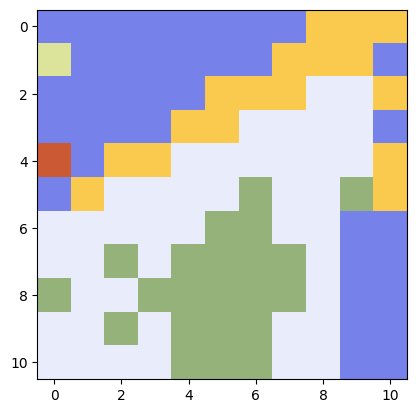

In [25]:
classes = list(set(sf_mat.reshape(-1,)))
n_class = len(classes)

colors = np.random.rand(n_class,4)
dic = {}
for i in range(n_class):
    dic[classes[i]] = colors[i]
    

img = np.zeros((num,num,4))
for i in range(num):
    for j in range(num):
        img[i][j] = dic[sf_mat[i][j]]
plt.imshow(img)

In [26]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', '1/x', '1/x^2', '1/x^3', '1/x^4', 'sqrt', '1/sqrt(x)', 'exp', 'log', 'abs', 'sin', 'tan', 'tanh', 'sigmoid', 'sgn', 'arcsin', 'arctan', 'arctanh', '0', 'gaussian', 'cosh'])

In [27]:
lib = ['exp', 'x^2', 'sin']
def mix(a, b, bound=1):
    num_pts = 101
    x = torch.linspace(-bound,bound,steps=num_pts)
    x = x[:,None]
    y = a * torch.sin(x) + b * x**2 + (1-a-b) * torch.exp(x)
    dataset = {}
    dataset['train_input'] = dataset['test_input'] = x
    dataset['train_label'] = dataset['test_label'] = y
    model = KAN(width=[1,1], grid=10, k=3, seed=0, grid_range=(-bound,bound))
    model.train(dataset, opt="LBFGS", steps=20)
    return model.suggest_symbolic(0,0,0,lib=lib)[0]

In [28]:
num = 11
a_arr = np.linspace(0,1,num=num)
b_arr = np.linspace(0,1,num=num)
sf_mat = np.empty((num,num), dtype='U8')

for i in range(num):
    for j in range(num):
        a = a_arr[i]; b = b_arr[j]
        sf_mat[i,j] = mix(a, b, bound=0.3)

train loss: 2.17e-08 | test loss: 2.17e-08 | reg: 2.58e-01 : 100%|██| 20/20 [00:00<00:00, 88.31it/s]


function , r2
exp , 0.9999999999999644
x^2 , 0.9999841274399759
sin , 0.9999195962429366


train loss: 2.02e-08 | test loss: 2.02e-08 | reg: 2.30e-01 : 100%|██| 20/20 [00:00<00:00, 67.42it/s]


function , r2
exp , 0.9999940363902167
x^2 , 0.9999842116985498
sin , 0.9999055408901225


train loss: 1.87e-08 | test loss: 1.87e-08 | reg: 2.03e-01 : 100%|██| 20/20 [00:00<00:00, 72.57it/s]


function , r2
x^2 , 0.9999842858440603
exp , 0.9999260405310275
sin , 0.9998863859519448


train loss: 1.71e-08 | test loss: 1.71e-08 | reg: 1.76e-01 : 100%|██| 20/20 [00:00<00:00, 83.25it/s]


function , r2
x^2 , 0.9999843962719616
exp , 0.9999007440045722
sin , 0.9998593570240344


train loss: 1.56e-08 | test loss: 1.56e-08 | reg: 1.50e-01 : 100%|██| 20/20 [00:00<00:00, 85.46it/s]


function , r2
x^2 , 0.9999845742894069
sin , 0.9998195334563368
exp , 0.9996560303117142


train loss: 1.41e-08 | test loss: 1.41e-08 | reg: 1.24e-01 : 100%|██| 20/20 [00:00<00:00, 77.55it/s]


function , r2
x^2 , 0.9999848839841206
sin , 0.9997576089235529
exp , 0.9990747506001695


train loss: 1.26e-08 | test loss: 1.26e-08 | reg: 9.83e-02 : 100%|██| 20/20 [00:00<00:00, 78.01it/s]


function , r2
x^2 , 0.9999854490362982
sin , 0.9996549423470966
exp , 0.9970989669462708


train loss: 1.11e-08 | test loss: 1.11e-08 | reg: 7.39e-02 : 100%|██| 20/20 [00:00<00:00, 82.81it/s]


function , r2
x^2 , 0.999986564630741
sin , 0.9994730789221318
exp , 0.9895624276328455


train loss: 9.54e-09 | test loss: 9.54e-09 | reg: 5.21e-02 : 100%|██| 20/20 [00:00<00:00, 82.59it/s]


function , r2
x^2 , 0.9999889651857167
sin , 0.9991205944977607
exp , 0.9559414617050508


train loss: 8.03e-09 | test loss: 8.03e-09 | reg: 4.00e-02 : 100%|█| 20/20 [00:00<00:00, 101.43it/s]


function , r2
x^2 , 0.9999924793158382
sin , 0.9987167102775214
exp , 0.7906888762419649


train loss: 6.57e-09 | test loss: 6.57e-09 | reg: 3.95e-02 : 100%|██| 20/20 [00:00<00:00, 58.49it/s]


function , r2
x^2 , 0.9999982519802606
sin , 0.9975488884151689
exp , 0.2695851370476988


train loss: 2.04e-08 | test loss: 2.04e-08 | reg: 2.55e-01 : 100%|██| 20/20 [00:00<00:00, 87.07it/s]


function , r2
x^2 , 0.9999897864588119
exp , 0.9999411483660819
sin , 0.9999330609183816


train loss: 1.88e-08 | test loss: 1.88e-08 | reg: 2.28e-01 : 100%|██| 20/20 [00:00<00:00, 83.91it/s]


function , r2
x^2 , 0.9999903651857117
exp , 0.9999481583538409
sin , 0.999921591315305


train loss: 1.73e-08 | test loss: 1.73e-08 | reg: 2.01e-01 : 100%|██| 20/20 [00:00<00:00, 87.42it/s]


function , r2
x^2 , 0.9999910667255901
exp , 0.9999745307385747
sin , 0.9999059037180363


train loss: 1.58e-08 | test loss: 1.58e-08 | reg: 1.75e-01 : 100%|██| 20/20 [00:00<00:00, 76.54it/s]


function , r2
x^2 , 0.9999919340025065
sin , 0.9998836753551348
exp , 0.9998682812610514


train loss: 1.43e-08 | test loss: 1.43e-08 | reg: 1.49e-01 : 100%|██| 20/20 [00:00<00:00, 91.13it/s]


function , r2
x^2 , 0.9999930282260955
sin , 0.9998507984085154
exp , 0.9997376724009517


train loss: 1.28e-08 | test loss: 1.28e-08 | reg: 1.23e-01 : 100%|██| 20/20 [00:00<00:00, 87.40it/s]


function , r2
x^2 , 0.9999944249681498
sin , 0.9997993496975227
exp , 0.9992295248899703


train loss: 1.12e-08 | test loss: 1.12e-08 | reg: 9.78e-02 : 100%|██| 20/20 [00:00<00:00, 80.88it/s]


function , r2
x^2 , 0.9999962146965505
sin , 0.9997131766878801
exp , 0.997544198118455


train loss: 9.73e-09 | test loss: 9.73e-09 | reg: 7.42e-02 : 100%|██| 20/20 [00:00<00:00, 82.59it/s]


function , r2
x^2 , 0.9999983708152995
sin , 0.9995575032139309
exp , 0.9909835169328546


train loss: 8.22e-09 | test loss: 8.22e-09 | reg: 5.33e-02 : 100%|██| 20/20 [00:00<00:00, 88.74it/s]


function , r2
x^2 , 0.9999990354001272
sin , 0.999266282220882
exp , 0.9605273197638998


train loss: 6.73e-09 | test loss: 6.73e-09 | reg: 4.04e-02 : 100%|██| 20/20 [00:00<00:00, 73.31it/s]


function , r2
x^2 , 0.9999913264862706
sin , 0.998872144597172
exp , 0.8001171283255731


train loss: 5.20e-09 | test loss: 5.20e-09 | reg: 4.08e-02 : 100%|██| 20/20 [00:00<00:00, 80.45it/s]


function , r2
x^2 , 0.9998163363473063
sin , 0.9978431561004178
exp , 0.2814546223974907


train loss: 1.90e-08 | test loss: 1.90e-08 | reg: 2.53e-01 : 100%|██| 20/20 [00:00<00:00, 89.50it/s]


function , r2
exp , 0.9999999483032614
x^2 , 0.9999941967835663
sin , 0.9999450777770007


train loss: 1.75e-08 | test loss: 1.75e-08 | reg: 2.26e-01 : 100%|██| 20/20 [00:00<00:00, 88.20it/s]


function , r2
exp , 0.9999968986658573
x^2 , 0.9999950270576956
sin , 0.9999359202088125


train loss: 1.60e-08 | test loss: 1.60e-08 | reg: 2.00e-01 : 100%|██| 20/20 [00:00<00:00, 94.92it/s]


function , r2
x^2 , 0.9999959671234422
exp , 0.999968957926832
sin , 0.9999233338974575


train loss: 1.45e-08 | test loss: 1.45e-08 | reg: 1.73e-01 : 100%|██| 20/20 [00:00<00:00, 81.41it/s]


function , r2
x^2 , 0.9999970388608245
exp , 0.9999277672147725
sin , 0.9999054264398953


train loss: 1.30e-08 | test loss: 1.30e-08 | reg: 1.48e-01 : 100%|██| 20/20 [00:00<00:00, 74.88it/s]


function , r2
x^2 , 0.9999981866112712
sin , 0.9998787853749938
exp , 0.9997940227931742


train loss: 1.14e-08 | test loss: 1.14e-08 | reg: 1.22e-01 : 100%|██| 20/20 [00:00<00:00, 85.54it/s]


function , r2
x^2 , 0.999999330593024
sin , 0.9998368059018379
exp , 0.999356951656669


train loss: 9.92e-09 | test loss: 9.92e-09 | reg: 9.77e-02 : 100%|██| 20/20 [00:00<00:00, 95.05it/s]


function , r2
x^2 , 0.9999999767252411
sin , 0.9997657565529914
exp , 0.9979264009347381


train loss: 8.41e-09 | test loss: 8.41e-09 | reg: 7.48e-02 : 100%|██| 20/20 [00:00<00:00, 99.50it/s]


function , r2
x^2 , 0.9999970458743088
sin , 0.9996348080942388
exp , 0.9922256134131591


train loss: 6.90e-09 | test loss: 6.90e-09 | reg: 5.51e-02 : 100%|██| 20/20 [00:00<00:00, 96.67it/s]


function , r2
x^2 , 0.9999882011589603
sin , 0.9993792035049314
exp , 0.9648688512302855


train loss: 5.37e-09 | test loss: 5.37e-09 | reg: 4.22e-02 : 100%|██| 20/20 [00:00<00:00, 87.85it/s]


function , r2
x^2 , 0.9999431478124357
sin , 0.9989853642954684
exp , 0.8099064637431908


train loss: 3.88e-09 | test loss: 3.88e-09 | reg: 4.35e-02 : 100%|██| 20/20 [00:00<00:00, 98.84it/s]


function , r2
x^2 , 0.9991878132395334
sin , 0.9979687145951794
exp , 0.29482440177114644


train loss: 1.77e-08 | test loss: 1.77e-08 | reg: 2.51e-01 : 100%|██| 20/20 [00:00<00:00, 82.69it/s]


function , r2
x^2 , 0.999997383794919
sin , 0.9999556108208649
exp , 0.9999423526821413


train loss: 1.62e-08 | test loss: 1.62e-08 | reg: 2.25e-01 : 100%|██| 20/20 [00:00<00:00, 82.68it/s]


function , r2
x^2 , 0.9999981726743806
sin , 0.9999484842856888
exp , 0.9999473753355891


train loss: 1.47e-08 | test loss: 1.47e-08 | reg: 1.98e-01 : 100%|██| 20/20 [00:00<00:00, 93.72it/s]


function , r2
x^2 , 0.9999989595646077
exp , 0.9999492978808692
sin , 0.9999386215876


train loss: 1.32e-08 | test loss: 1.32e-08 | reg: 1.72e-01 : 100%|██| 20/20 [00:00<00:00, 96.37it/s]


function , r2
x^2 , 0.9999996254779265
exp , 0.999940319985504
sin , 0.9999245063324299


train loss: 1.16e-08 | test loss: 1.16e-08 | reg: 1.47e-01 : 100%|██| 20/20 [00:00<00:00, 86.84it/s]


function , r2
x^2 , 0.9999999902142922
sin , 0.9999033788428092
exp , 0.999823386227322


train loss: 1.01e-08 | test loss: 1.01e-08 | reg: 1.22e-01 : 100%|██| 20/20 [00:00<00:00, 95.90it/s]


function , r2
x^2 , 0.9999993945260793
sin , 0.9998698461073248
exp , 0.9994604176641041


train loss: 8.60e-09 | test loss: 8.60e-09 | reg: 9.78e-02 : 100%|██| 20/20 [00:00<00:00, 82.21it/s]


function , r2
x^2 , 0.9999962624915456
sin , 0.9998123948376537
exp , 0.998247061252589


train loss: 7.09e-09 | test loss: 7.09e-09 | reg: 7.58e-02 : 100%|██| 20/20 [00:00<00:00, 82.66it/s]


function , r2
x^2 , 0.9999855256919397
sin , 0.9997042323556428
exp , 0.9934084524696931


train loss: 5.56e-09 | test loss: 5.56e-09 | reg: 5.74e-02 : 100%|█| 20/20 [00:00<00:00, 102.39it/s]


function , r2
x^2 , 0.9999509121969333
sin , 0.9994826743156425
exp , 0.9690407199009085


train loss: 4.05e-09 | test loss: 4.05e-09 | reg: 4.54e-02 : 100%|██| 20/20 [00:00<00:00, 81.06it/s]


function , r2
x^2 , 0.99983064550939
sin , 0.9990671369297374
exp , 0.8200102819626097


train loss: 2.55e-09 | test loss: 2.55e-09 | reg: 4.76e-02 : 100%|██| 20/20 [00:00<00:00, 86.68it/s]


function , r2
x^2 , 0.997955058426217
sin , 0.9978931765391928
exp , 0.3099717698150306


train loss: 1.64e-08 | test loss: 1.64e-08 | reg: 2.50e-01 : 100%|██| 20/20 [00:00<00:00, 88.58it/s]


function , r2
exp , 0.999999543577251
x^2 , 0.9999993202720657
sin , 0.999964632973254


train loss: 1.49e-08 | test loss: 1.49e-08 | reg: 2.23e-01 : 100%|██| 20/20 [00:00<00:00, 77.08it/s]


function , r2
x^2 , 0.9999997764167106
exp , 0.9999936654595996
sin , 0.999959251977657


train loss: 1.34e-08 | test loss: 1.34e-08 | reg: 1.97e-01 : 100%|██| 20/20 [00:00<00:00, 92.83it/s]


function , r2
x^2 , 0.9999999292547436
exp , 0.9999841395212841
sin , 0.9999517274457889


train loss: 1.19e-08 | test loss: 1.19e-08 | reg: 1.71e-01 : 100%|██| 20/20 [00:00<00:00, 77.84it/s]


function , r2
x^2 , 0.99999969171966
sin , 0.9999408710455842
exp , 0.9999069779385736


train loss: 1.03e-08 | test loss: 1.03e-08 | reg: 1.46e-01 : 100%|█| 20/20 [00:00<00:00, 101.15it/s]


function , r2
x^2 , 0.9999982862472426
sin , 0.9999245002027557
exp , 0.9998279543178685


train loss: 8.80e-09 | test loss: 8.80e-09 | reg: 1.21e-01 : 100%|██| 20/20 [00:00<00:00, 87.21it/s]


function , r2
x^2 , 0.9999943992610838
sin , 0.9998982872841851
exp , 0.9995430618745483


train loss: 7.28e-09 | test loss: 7.28e-09 | reg: 9.82e-02 : 100%|██| 20/20 [00:00<00:00, 91.02it/s]


function , r2
x^2 , 0.9999846769079374
sin , 0.9998527941959722
exp , 0.9985073658776659


train loss: 5.76e-09 | test loss: 5.76e-09 | reg: 7.72e-02 : 100%|██| 20/20 [00:00<00:00, 85.96it/s]


function , r2
x^2 , 0.9999591064199033
sin , 0.9997651030703611
exp , 0.9944058376116279


train loss: 4.24e-09 | test loss: 4.24e-09 | reg: 6.02e-02 : 100%|██| 20/20 [00:00<00:00, 89.87it/s]


function , r2
x^2 , 0.9998837805076631
sin , 0.9995754338856193
exp , 0.972913947720796


train loss: 2.73e-09 | test loss: 2.73e-09 | reg: 5.00e-02 : 100%|██| 20/20 [00:00<00:00, 89.00it/s]


function , r2
x^2 , 0.9996498645454885
sin , 0.9991201921208083
exp , 0.830350622425691


train loss: 1.24e-09 | test loss: 1.24e-09 | reg: 5.35e-02 : 100%|██| 20/20 [00:00<00:00, 89.72it/s]


function , r2
sin , 0.9975671382661347
x^2 , 0.9959025139130326
exp , 0.3272398324223151


train loss: 1.51e-08 | test loss: 1.51e-08 | reg: 2.48e-01 : 100%|██| 20/20 [00:00<00:00, 73.39it/s]


function , r2
x^2 , 0.9999999273977533
sin , 0.9999721370876149
exp , 0.9999416230309799


train loss: 1.36e-08 | test loss: 1.36e-08 | reg: 2.22e-01 : 100%|██| 20/20 [00:00<00:00, 91.06it/s]


function , r2
x^2 , 0.9999998145393889
sin , 0.9999682142467776
exp , 0.9999659993561614


train loss: 1.21e-08 | test loss: 1.21e-08 | reg: 1.96e-01 : 100%|██| 20/20 [00:00<00:00, 96.04it/s]


function , r2
x^2 , 0.999999032797963
sin , 0.99996264038059
exp , 0.9999479302673174


train loss: 1.05e-08 | test loss: 1.05e-08 | reg: 1.71e-01 : 100%|██| 20/20 [00:00<00:00, 68.07it/s]


function , r2
x^2 , 0.9999971222659805
sin , 0.9999545031186275
exp , 0.9999322662924468


train loss: 9.01e-09 | test loss: 9.01e-09 | reg: 1.46e-01 : 100%|██| 20/20 [00:00<00:00, 97.55it/s]


function , r2
x^2 , 0.9999928506457251
sin , 0.9999421177337827
exp , 0.9998097288009739


train loss: 7.49e-09 | test loss: 7.49e-09 | reg: 1.21e-01 : 100%|██| 20/20 [00:00<00:00, 78.44it/s]


function , r2
x^2 , 0.999982236040884
sin , 0.9999220769609787
exp , 0.9996077177349811


train loss: 5.96e-09 | test loss: 5.96e-09 | reg: 9.89e-02 : 100%|█| 20/20 [00:00<00:00, 107.77it/s]


function , r2
x^2 , 0.9999648024536064
sin , 0.999886795749932
exp , 0.9987081345799479


train loss: 4.44e-09 | test loss: 4.44e-09 | reg: 7.88e-02 : 100%|██| 20/20 [00:00<00:00, 95.47it/s]


function , r2
x^2 , 0.9999175944140614
sin , 0.9998169466732463
exp , 0.9952629708229556


train loss: 2.92e-09 | test loss: 2.92e-09 | reg: 6.33e-02 : 100%|██| 20/20 [00:00<00:00, 87.69it/s]


function , r2
x^2 , 0.9997839395317202
sin , 0.9996559816486681
exp , 0.9765461190416509


train loss: 1.43e-09 | test loss: 1.43e-09 | reg: 5.57e-02 : 100%|██| 20/20 [00:00<00:00, 88.25it/s]


function , r2
x^2 , 0.9993615297175583
sin , 0.9992162433632387
exp , 0.8408048846009317


train loss: 3.45e-10 | test loss: 3.45e-10 | reg: 6.15e-02 : 100%|██| 20/20 [00:00<00:00, 82.50it/s]


function , r2
sin , 0.9969431394272165
x^2 , 0.9927325368787109
exp , 0.34705555029226853


train loss: 1.38e-08 | test loss: 1.38e-08 | reg: 2.47e-01 : 100%|██| 20/20 [00:00<00:00, 85.66it/s]


function , r2
x^2 , 0.9999993835845867
exp , 0.9999979009384118
sin , 0.9999781529176954


train loss: 1.23e-08 | test loss: 1.23e-08 | reg: 2.21e-01 : 100%|██| 20/20 [00:00<00:00, 90.75it/s]


function , r2
x^2 , 0.9999982596377534
exp , 0.999982664240221
sin , 0.9999754030046771


train loss: 1.07e-08 | test loss: 1.07e-08 | reg: 1.95e-01 : 100%|██| 20/20 [00:00<00:00, 92.99it/s]


function , r2
x^2 , 0.999996048097869
sin , 0.9999713985665664
exp , 0.999967869389025


train loss: 9.22e-09 | test loss: 9.22e-09 | reg: 1.70e-01 : 100%|██| 20/20 [00:00<00:00, 98.23it/s]


function , r2
x^2 , 0.9999915371924133
sin , 0.9999654552835952
exp , 0.999952775225426


train loss: 7.70e-09 | test loss: 7.70e-09 | reg: 1.45e-01 : 100%|██| 20/20 [00:00<00:00, 98.51it/s]


function , r2
x^2 , 0.9999840061625549
sin , 0.9999562904170536
exp , 0.9998487056952645


train loss: 6.17e-09 | test loss: 6.17e-09 | reg: 1.22e-01 : 100%|██| 20/20 [00:00<00:00, 97.47it/s]


function , r2
x^2 , 0.9999686012308747
sin , 0.9999412814570923
exp , 0.9996568552970292


train loss: 4.65e-09 | test loss: 4.65e-09 | reg: 9.98e-02 : 100%|██| 20/20 [00:00<00:00, 79.16it/s]


function , r2
x^2 , 0.9999362105831199
sin , 0.9999144078643796
exp , 0.998905881233251


train loss: 3.13e-09 | test loss: 3.13e-09 | reg: 8.08e-02 : 100%|██| 20/20 [00:00<00:00, 86.70it/s]


function , r2
x^2 , 0.9998600127006615
sin , 0.9998596147804757
exp , 0.9960274461775963


train loss: 1.63e-09 | test loss: 1.63e-09 | reg: 6.69e-02 : 100%|██| 20/20 [00:00<00:00, 92.10it/s]


function , r2
sin , 0.9997236129912016
x^2 , 0.9996456211565093
exp , 0.9798815731347926


train loss: 3.91e-10 | test loss: 3.91e-10 | reg: 6.21e-02 : 100%|██| 20/20 [00:00<00:00, 79.24it/s]


function , r2
sin , 0.9992448590831204
x^2 , 0.9989434205374691
exp , 0.8513636521721608


train loss: 1.48e-09 | test loss: 1.48e-09 | reg: 6.99e-02 : 100%|██| 20/20 [00:00<00:00, 79.84it/s]


function , r2
sin , 0.9959631104008001
x^2 , 0.9880298934422714
exp , 0.3699525676503869


train loss: 1.25e-08 | test loss: 1.25e-08 | reg: 2.46e-01 : 100%|██| 20/20 [00:00<00:00, 78.42it/s]


function , r2
x^2 , 0.9999974755376956
sin , 0.9999827716185714
exp , 0.9999378510073136


train loss: 1.10e-08 | test loss: 1.10e-08 | reg: 2.20e-01 : 100%|█| 20/20 [00:00<00:00, 104.32it/s]


function , r2
x^2 , 0.9999950949411469
sin , 0.9999809179820958
exp , 0.9999775858848498


train loss: 9.43e-09 | test loss: 9.43e-09 | reg: 1.94e-01 : 100%|██| 20/20 [00:00<00:00, 63.86it/s]


function , r2
x^2 , 0.9999909995161033
sin , 0.9999781197360954
exp , 0.999974565079622


train loss: 7.91e-09 | test loss: 7.91e-09 | reg: 1.69e-01 : 100%|██| 20/20 [00:00<00:00, 67.66it/s]


function , r2
x^2 , 0.9999839054192226
sin , 0.9999738708591347
exp , 0.9999301819009281


train loss: 6.39e-09 | test loss: 6.39e-09 | reg: 1.45e-01 : 100%|█| 20/20 [00:00<00:00, 101.35it/s]


function , r2
x^2 , 0.9999712511423531
sin , 0.9999672116732748
exp , 0.9998759476535739


train loss: 4.87e-09 | test loss: 4.87e-09 | reg: 1.22e-01 : 100%|██| 20/20 [00:00<00:00, 84.28it/s]


function , r2
sin , 0.9999561449575439
x^2 , 0.9999474340188927
exp , 0.9996925240662109


train loss: 3.36e-09 | test loss: 3.36e-09 | reg: 1.01e-01 : 100%|██| 20/20 [00:00<00:00, 84.49it/s]


function , r2
sin , 0.9999359791631405
x^2 , 0.9998987103020315
exp , 0.9990779156643446


train loss: 1.86e-09 | test loss: 1.86e-09 | reg: 8.32e-02 : 100%|██| 20/20 [00:00<00:00, 94.36it/s]


function , r2
sin , 0.999893422871959
x^2 , 0.9997851521885349
exp , 0.9966235714629872


train loss: 5.79e-10 | test loss: 5.79e-10 | reg: 7.13e-02 : 100%|██| 20/20 [00:00<00:00, 82.55it/s]


function , r2
sin , 0.9997784124895244
x^2 , 0.9994637170579774
exp , 0.9828804558632391


train loss: 1.33e-09 | test loss: 1.33e-09 | reg: 6.87e-02 : 100%|██| 20/20 [00:00<00:00, 75.15it/s]


function , r2
sin , 0.9992376323412937
x^2 , 0.998359181484209
exp , 0.862391351730847


train loss: 2.79e-09 | test loss: 2.79e-09 | reg: 7.94e-02 : 100%|██| 20/20 [00:00<00:00, 85.99it/s]


function , r2
sin , 0.994411048556694
x^2 , 0.9816962475571241
exp , 0.39659919095058493


train loss: 1.12e-08 | test loss: 1.12e-08 | reg: 2.45e-01 : 100%|██| 20/20 [00:00<00:00, 93.93it/s]


function , r2
x^2 , 0.9999942564461135
exp , 0.999993433797752
sin , 0.999986164836458


train loss: 9.65e-09 | test loss: 9.65e-09 | reg: 2.19e-01 : 100%|██| 20/20 [00:00<00:00, 80.70it/s]


function , r2
x^2 , 0.9999902923651274
sin , 0.9999849518514742
exp , 0.9999613659018812


train loss: 8.13e-09 | test loss: 8.13e-09 | reg: 1.94e-01 : 100%|██| 20/20 [00:00<00:00, 95.81it/s]


function , r2
x^2 , 0.9999837274021132
sin , 0.999983030829973
exp , 0.9999154398627085


train loss: 6.61e-09 | test loss: 6.61e-09 | reg: 1.69e-01 : 100%|██| 20/20 [00:00<00:00, 88.30it/s]


function , r2
sin , 0.9999800294496701
x^2 , 0.9999731551294311
exp , 0.999904362598859


train loss: 5.09e-09 | test loss: 5.09e-09 | reg: 1.45e-01 : 100%|█| 20/20 [00:00<00:00, 118.88it/s]


function , r2
sin , 0.9999752362233533
x^2 , 0.9999543237918451
exp , 0.9998837024119785


train loss: 3.59e-09 | test loss: 3.59e-09 | reg: 1.23e-01 : 100%|█| 20/20 [00:00<00:00, 105.48it/s]


function , r2
sin , 0.9999671472397121
x^2 , 0.9999205202425738
exp , 0.9997162974965992


train loss: 2.11e-09 | test loss: 2.11e-09 | reg: 1.02e-01 : 100%|██| 20/20 [00:00<00:00, 97.32it/s]


function , r2
sin , 0.9999521118042969
x^2 , 0.999851719897101
exp , 0.9991994724318086


train loss: 8.18e-10 | test loss: 8.18e-10 | reg: 8.60e-02 : 100%|██| 20/20 [00:00<00:00, 88.11it/s]


function , r2
sin , 0.9999191931583885
x^2 , 0.9996922419093021
exp , 0.9971630293147632


train loss: 1.23e-09 | test loss: 1.23e-09 | reg: 7.58e-02 : 100%|██| 20/20 [00:00<00:00, 87.23it/s]


function , r2
sin , 0.999821425904547
x^2 , 0.9992365904482939
exp , 0.9855351478513158


train loss: 2.62e-09 | test loss: 2.62e-09 | reg: 7.77e-02 : 100%|██| 20/20 [00:00<00:00, 86.77it/s]


function , r2
sin , 0.9992094653472375
x^2 , 0.9975614883067705
exp , 0.8738196605530134


train loss: 4.10e-09 | test loss: 4.10e-09 | reg: 9.07e-02 : 100%|██| 20/20 [00:00<00:00, 93.98it/s]


function , r2
sin , 0.9922364482387487
x^2 , 0.9865738449053225
exp , 0.427830379721284


train loss: 9.87e-09 | test loss: 9.87e-09 | reg: 2.44e-01 : 100%|██| 20/20 [00:00<00:00, 87.93it/s]


function , r2
x^2 , 0.9999896926876513
sin , 0.9999885782292597
exp , 0.9999292279785709


train loss: 8.35e-09 | test loss: 8.35e-09 | reg: 2.18e-01 : 100%|██| 20/20 [00:00<00:00, 79.72it/s]


function , r2
sin , 0.9999877872886289
x^2 , 0.9999838323247726
exp , 0.9999789165975953


train loss: 6.84e-09 | test loss: 6.84e-09 | reg: 1.93e-01 : 100%|█| 20/20 [00:00<00:00, 102.77it/s]


function , r2
sin , 0.9999864664395037
x^2 , 0.9999745891030756
exp , 0.9999649555505435


train loss: 5.32e-09 | test loss: 5.32e-09 | reg: 1.69e-01 : 100%|██| 20/20 [00:00<00:00, 95.93it/s]


function , r2
sin , 0.9999843410323517
x^2 , 0.9999595824867888
exp , 0.9999363993653958


train loss: 3.83e-09 | test loss: 3.83e-09 | reg: 1.46e-01 : 100%|██| 20/20 [00:00<00:00, 94.29it/s]


function , r2
sin , 0.9999808836617454
x^2 , 0.999934065895105
exp , 0.999872780629266


train loss: 2.36e-09 | test loss: 2.36e-09 | reg: 1.24e-01 : 100%|██| 20/20 [00:00<00:00, 66.77it/s]


function , r2
sin , 0.9999749630672355
x^2 , 0.999887715828985
exp , 0.9997292201762232


train loss: 1.08e-09 | test loss: 1.08e-09 | reg: 1.04e-01 : 100%|██| 20/20 [00:00<00:00, 68.87it/s]


function , r2
sin , 0.999963751419211
x^2 , 0.9997949968736238
exp , 0.9992688918333246


train loss: 1.18e-09 | test loss: 1.18e-09 | reg: 8.91e-02 : 100%|██| 20/20 [00:00<00:00, 84.93it/s]


function , r2
sin , 0.9999382587555897
x^2 , 0.9995804083539281
exp , 0.9975625479321294


train loss: 2.49e-09 | test loss: 2.49e-09 | reg: 8.13e-02 : 100%|██| 20/20 [00:00<00:00, 78.13it/s]


function , r2
sin , 0.9998545572839219
x^2 , 0.9989551972027602
exp , 0.9878365883771715


train loss: 3.94e-09 | test loss: 3.94e-09 | reg: 8.77e-02 : 100%|██| 20/20 [00:00<00:00, 75.67it/s]


function , r2
sin , 0.999179162083246
x^2 , 0.9964947779629276
exp , 0.8855949581121205


train loss: 5.41e-09 | test loss: 5.41e-09 | reg: 1.03e-01 : 100%|██| 20/20 [00:00<00:00, 89.06it/s]


function , r2
x^2 , 0.9896743802292985
sin , 0.9893409020738266
exp , 0.4646785424172849


train loss: 8.57e-09 | test loss: 8.57e-09 | reg: 2.43e-01 : 100%|██| 20/20 [00:00<00:00, 84.02it/s]


function , r2
sin , 0.9999902713620984
x^2 , 0.9999807202369485
exp , 0.9997379079614049


train loss: 7.06e-09 | test loss: 7.06e-09 | reg: 2.18e-01 : 100%|██| 20/20 [00:00<00:00, 90.90it/s]


function , r2
sin , 0.9999897392501598
x^2 , 0.9999756704785926
exp , 0.9999263638849517


train loss: 5.56e-09 | test loss: 5.56e-09 | reg: 1.93e-01 : 100%|█| 20/20 [00:00<00:00, 100.98it/s]


function , r2
sin , 0.9999888074224438
x^2 , 0.9999631678784879
exp , 0.9999447765896622


train loss: 4.07e-09 | test loss: 4.07e-09 | reg: 1.69e-01 : 100%|██| 20/20 [00:00<00:00, 99.67it/s]


function , r2
sin , 0.9999872737863889
x^2 , 0.9999431335080625
exp , 0.9999263142234702


train loss: 2.62e-09 | test loss: 2.62e-09 | reg: 1.46e-01 : 100%|█| 20/20 [00:00<00:00, 107.49it/s]


function , r2
sin , 0.9999847406083522
x^2 , 0.9999094830421532
exp , 0.9998436631994787


train loss: 1.34e-09 | test loss: 1.34e-09 | reg: 1.25e-01 : 100%|██| 20/20 [00:00<00:00, 90.25it/s]


function , r2
sin , 0.999980363856357
x^2 , 0.9998488861976231
exp , 0.9997317586996326


train loss: 1.19e-09 | test loss: 1.19e-09 | reg: 1.06e-01 : 100%|██| 20/20 [00:00<00:00, 64.90it/s]


function , r2
sin , 0.9999719462457524
x^2 , 0.9997282247716587
exp , 0.9992837377083034


train loss: 2.37e-09 | test loss: 2.37e-09 | reg: 9.29e-02 : 100%|██| 20/20 [00:00<00:00, 64.13it/s]


function , r2
sin , 0.9999521133584003
x^2 , 0.9994484346482306
exp , 0.9978756985433855


train loss: 3.79e-09 | test loss: 3.79e-09 | reg: 8.83e-02 : 100%|██| 20/20 [00:00<00:00, 92.27it/s]


function , r2
sin , 0.9998801999855921
x^2 , 0.9986185082433823
exp , 0.9897729427714869


train loss: 5.25e-09 | test loss: 5.25e-09 | reg: 9.97e-02 : 100%|██| 20/20 [00:00<00:00, 86.61it/s]


function , r2
sin , 0.9991252607344454
x^2 , 0.9950784594053942
exp , 0.8974993831898135


train loss: 6.71e-09 | test loss: 6.71e-09 | reg: 1.16e-01 : 100%|██| 20/20 [00:00<00:00, 89.64it/s]


function , r2
x^2 , 0.9896966425105427
sin , 0.985121455995764
exp , 0.5083877880558068


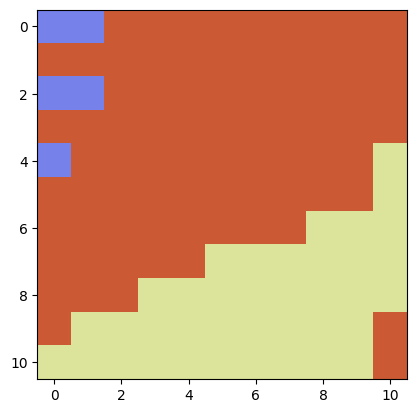

In [29]:
classes = list(set(sf_mat.reshape(-1,)))
n_class = len(classes)

colors = np.random.rand(n_class,4)
dic = {}
for i in range(n_class):
    dic[classes[i]] = colors[i]
    

img = np.zeros((num,num,4))
for i in range(num):
    for j in range(num):
        img[i][j] = dic[sf_mat[i][j]]
plt.imshow(img)

这两张图不会分析